# Imports

In [574]:
import joblib
import pandas as pd
from scipy.stats import percentileofscore
from datetime import datetime
import numpy as np
import math

In [575]:
# Chargement des modèles depuis le dossier 'models'
model_RF_ADC = joblib.load("../models/model_RF_ADC.joblib")
model_RF_support = joblib.load("../models/model_RF_support.joblib")
model_RF_jungler = joblib.load("../models/model_RF_jungler.joblib")
model_RF_top = joblib.load("../models/model_RF_top.joblib")
model_RF_mid = joblib.load("../models/model_RF_mid.joblib")
df_adc = joblib.load("../models/df_adc.joblib")
df_jungler = joblib.load("../models/df_jungler.joblib")
df_mid = joblib.load("../models/df_mid.joblib")
df_support = joblib.load("../models/df_support.joblib")
df_top = joblib.load("../models/df_top.joblib")
features_Bot = joblib.load("../models/features_Bot.joblib")
features_jungler = joblib.load("../models/features_jungler.joblib")
features_mid = joblib.load("../models/features_mid.joblib")
features_support = joblib.load("../models/features_support.joblib")
features_top = joblib.load("../models/features_top.joblib")


# Ajout de la probabilité de victoire pour chaque joueur et chaque match

## ADC

In [576]:
X_all_adc = df_adc[features_Bot]

# 2. Prédire les probabilités avec le modèle entraîné
proba_victoire = model_RF_ADC.predict_proba(X_all_adc)[:, 1]  # Probabilité de victoire (classe 1)

# 3. Ajouter player_id et game_id pour chaque ligne
resultats_adc = df_adc[['player_id', 'player_name', 'game_id']].copy()
resultats_adc['proba_victoire'] = proba_victoire
resultats_adc['role'] = 'Bot'  # Optionnel pour filtrer plus tard

resultats_adc.head()


,player_id,player_name,game_id,proba_victoire,role
2,2,yanxuan,15,0.122922,Bot
7,7,Virus,15,0.973544,Bot
15,15,Jz,16,0.294616,Bot
19,19,Rainbow,16,0.973444,Bot
23,15,Jz,17,0.011759,Bot


## Support

In [577]:
X_all_support = df_support[features_support]

# 2. Prédire les probabilités avec le modèle entraîné
proba_victoire = model_RF_support.predict_proba(X_all_support)[:, 1]  # Probabilité de victoire (classe 1)

# 3. Ajouter player_id et game_id pour chaque ligne
resultats_support = df_support[['player_id', 'player_name', 'game_id']].copy()
resultats_support['proba_victoire'] = proba_victoire
resultats_support['role'] = 'Support'  # Optionnel pour filtrer plus tard

resultats_support.head()

,player_id,player_name,game_id,proba_victoire,role
3,3,Viod,15,0.062434,Support
5,5,Yui,15,0.996282,Support
12,12,Martin,16,0.415938,Support
18,18,ppgod,16,0.975217,Support
24,12,Martin,17,0.006769,Support


## Jungler

In [578]:
X_all_jungler = df_jungler[features_jungler]

# 2. Prédire les probabilités avec le modèle entraîné
proba_victoire = model_RF_jungler.predict_proba(X_all_jungler)[:, 1]  # Probabilité de victoire (classe 1)

# 3. Ajouter player_id et game_id pour chaque ligne
resultats_jungler = df_jungler[['player_id', 'player_name', 'game_id']].copy()
resultats_jungler['proba_victoire'] = proba_victoire
resultats_jungler['role'] = 'Jungle'  # Optionnel pour filtrer plus tard

resultats_jungler.head()

,player_id,player_name,game_id,proba_victoire,role
6,6,Chieftain,15,0.994445,Jungle
9,9,CatJug,15,0.520480,Jungle
13,13,XMJ,16,0.251604,Jungle
16,16,fortunate,16,0.175299,Jungle
20,16,fortunate,17,0.017177,Jungle


## Top

In [579]:
X_all_top = df_top[features_top]

# 2. Prédire les probabilités avec le modèle entraîné
proba_victoire = model_RF_top.predict_proba(X_all_top)[:, 1]  # Probabilité de victoire (classe 1)

# 3. Ajouter player_id et game_id pour chaque ligne
resultats_top = df_top[['player_id', 'player_name', 'game_id']].copy()
resultats_top['proba_victoire'] = proba_victoire
resultats_top['role'] = 'Top'  # Optionnel pour filtrer plus tard

resultats_top.head()

,player_id,player_name,game_id,proba_victoire,role
0,0,shanji,15,0.034129,Top
1,1,Demon,15,0.765080,Top
10,10,xiao7,16,0.923291,Top
14,14,Spunk,16,0.186446,Top
22,10,xiao7,17,0.386713,Top


## Mid

In [580]:
X_all_mid = df_mid[features_mid]

# 2. Prédire les probabilités avec le modèle entraîné
proba_victoire = model_RF_mid.predict_proba(X_all_mid)[:, 1]  # Probabilité de victoire (classe 1)

# 3. Ajouter player_id et game_id pour chaque ligne
resultats_mid = df_mid[['player_id', 'player_name', 'game_id']].copy()
resultats_mid['proba_victoire'] = proba_victoire
resultats_mid['role'] = 'Mid'  # Optionnel pour filtrer plus tard

resultats_mid.head()

,player_id,player_name,game_id,proba_victoire,role
4,4,HanXuan,15,0.772216,Mid
8,8,Assassin,15,0.102831,Mid
11,11,1220,16,0.062912,Mid
17,17,Cepted,16,0.842367,Mid
25,11,1220,17,0.411883,Mid


## Rassemblage des résultats

In [581]:
resultats_all = pd.concat([resultats_adc, resultats_mid, resultats_top, resultats_jungler, resultats_support], ignore_index=True)

# resultats_all.describe()
resultats_all.head()

,player_id,player_name,game_id,proba_victoire,role
0,2,yanxuan,15,0.122922,Bot
1,7,Virus,15,0.973544,Bot
2,15,Jz,16,0.294616,Bot
3,19,Rainbow,16,0.973444,Bot
4,15,Jz,17,0.011759,Bot


# Standardisation des scores

## Calcul des percentiles par rôle

In [582]:
# Fonction pour calculer les percentiles par rôle
def compute_percentiles(df):
    df = df.copy()
    df['percentile'] = df['proba_victoire'].rank(pct=True) * 100
    return df

# Appliquer par rôle
resultats_all = resultats_all.groupby('role').apply(compute_percentiles).reset_index(drop=True)
resultats_all.head()


C:\Users\Nabil\AppData\Local\Temp\ipykernel_13956\3356754135.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultats_all = resultats_all.groupby('role').apply(compute_percentiles).reset_index(drop=True)


,player_id,player_name,game_id,proba_victoire,role,percentile
0,2,yanxuan,15,0.122922,Bot,32.352060
1,7,Virus,15,0.973544,Bot,84.507503
2,15,Jz,16,0.294616,Bot,42.716702
3,19,Rainbow,16,0.973444,Bot,84.473462
4,15,Jz,17,0.011759,Bot,4.856894


In [583]:
game_metadata_path = '../data/game_metadata.csv'
game_metadata_data = pd.read_csv(game_metadata_path) 

merged_df = pd.merge(resultats_all, game_metadata_data, on='game_id', how='left')
merged_df.head()

,player_id,player_name,game_id,proba_victoire,role,percentile,date,match_id,tournament_id,tournament_name,series_id,series_name,league_id,league_name
0,2,yanxuan,15,0.122922,Bot,32.352060,2019-09-15 06:03:38.000000,4,4,Playoffs,4,LDL Summer 2019,4,LDL
1,7,Virus,15,0.973544,Bot,84.507503,2019-09-15 06:03:38.000000,4,4,Playoffs,4,LDL Summer 2019,4,LDL
2,15,Jz,16,0.294616,Bot,42.716702,2019-09-15 09:18:10.000000,5,4,Playoffs,4,LDL Summer 2019,4,LDL
3,19,Rainbow,16,0.973444,Bot,84.473462,2019-09-15 09:18:10.000000,5,4,Playoffs,4,LDL Summer 2019,4,LDL
4,15,Jz,17,0.011759,Bot,4.856894,2019-09-15 10:16:19.000000,5,4,Playoffs,4,LDL Summer 2019,4,LDL


## Coefficient Ligue

In [584]:
merged_df['league_name'].unique()

array(['LDL', 'VCS', 'LEC', 'LJL', 'European Masters', 'CBLOL', 'Worlds',
       'Demacia Cup', 'KeSPA Cup', 'LPL', 'LCS Academy', 'LCS',
       'Ultraliga', 'Prime League 1st Division', 'LFL', 'LCK',
       'Challenger Korea', 'LVP SL', 'OPL', 'TCL', 'LLA', 'LCL', 'PCS',
       'Mid-Season Cup', 'PG Nationals', 'Belgian League', 'Dutch League',
       'LPLOL', 'NLC', 'Hitpoint Masters', 'EBL', 'Baltic Masters',
       'Iberian Cup', 'NEST', 'All-Star', 'LCK Challengers League',
       'CBLOL Academy', 'LCO', 'LCS Proving Grounds',
       'Mid-Season Invitational', 'Karmine Corp vs Ibai Showmatch',
       'LFL Division 2', 'GLL', 'Elite Series', 'LHE', 'LMF', 'DDH',
       'LCK Academy', 'Elements League', 'Prime League Super Cup',
       'Coupe de France', 'Season Kickoff', 'LVP SL 2nd Division',
       'North American Challengers League', 'Arabian League',
       'EMEA Masters', 'Ignis Cup', 'European Pro League',
       'TCL Division 2', 'Prime Pokal', 'Elite Series Benelux Masters'

In [585]:
league_tiers = {
    # Tier 1 – Top Compétitions internationales / régionales majeures
    'Worlds': 1, 'LEC': 1, 'LCK': 1, 'LPL': 1, 'LCS': 1, 'Mid-Season Invitational': 1, 'Mid-Season Cup': 1,

    # Tier 2 – Ligues majeures secondaires & académiques de haut niveau
    'PCS': 2, 'VCS': 2, 'LLA': 2, 'LJL': 2, 'CBLOL': 2, 'LCO': 2,
    'Challenger Korea': 2, 'LCS Academy': 2, 'LCK Challengers League': 2,
    'LEC Season Finals': 2, 'Demacia Cup': 2, 'KeSPA Cup': 2, 'LCL': 2, 'OPL': 2,
    'Esports World Cup': 2,  'North American Challengers League': 2, 'LCK Academy': 2, # compét international en essor

    # Tier 3 – ERLs (ligues européennes) et compétitions de second rang
    'LFL': 3, 'Prime League 1st Division': 3, 'Ultraliga': 3, 'PG Nationals': 3,
    'NLC': 3, 'LPLOL': 3, 'LVP SL': 3, 'EBL': 3, 'GLL': 3, 'Elite Series': 3,
    'European Masters': 3, 'EMEA Masters': 3, 'LDL': 3, 'Americas Challengers': 3,
    'Elements League': 3, 'LCS Proving Grounds': 3, 'LHE': 3, 'LMF': 3, 'Prime League Super Cup': 3,

    # Tier 4 – Deuxièmes divisions & ligues régionales émergentes
    'LFL Division 2': 4, 'TCL': 4, 'Arabian League': 4, 'LVP SL 2nd Division': 4,
    'TCL Division 2': 4, 'DDH': 4, 'Hitpoint Masters': 4, 'Baltic Masters': 4,
    'CBLOL Academy': 4, 'Elite Series Benelux Masters': 4, 'European Pro League': 4,

    # Tier 5 – Showmatchs, compétitions nationales à faible impact, et évènements spéciaux
    'Coupe de France': 5, 
    'Karmine Corp vs Ibai Showmatch': 5, 'Prime Pokal': 5, 'Superdome': 5,
    'Ignis Cup': 5, 'Iberian Cup': 5, 'Belgian League': 5,
    'Dutch League': 5, 'LIT': 5, 'NEST': 5, 
    'Red Bull League of Its Own': 5,'All-Star': 5, 'Season Kickoff': 5,
}

league_weight = {
    1: 1.00,   # Tier 1 (Worlds, LEC, LCK...)
    2: 0.75,   # Tier 2 (VCS, LLA, LCS Academy...)
    3: 0.50,   # Tier 3 (LFL, Ultraliga...)
    4: 0.30,   # Tier 4 (LFL Div 2, Hitpoint Masters...)
    5: 0.10    # Tier 5 (Showmatches, minor cups...)
}
# Puis :
league_weight = {league: league_weight[tier] for league, tier in league_tiers.items()}

In [586]:
merged_df['league_score'] = merged_df.apply(
    lambda row: row['percentile'] * league_weight.get(row['league_name'], 0), axis=1
)

merged_df.head()

,player_id,player_name,game_id,proba_victoire,role,percentile,date,match_id,tournament_id,tournament_name,series_id,series_name,league_id,league_name,league_score
0,2,yanxuan,15,0.122922,Bot,32.352060,2019-09-15 06:03:38.000000,4,4,Playoffs,4,LDL Summer 2019,4,LDL,16.176030
1,7,Virus,15,0.973544,Bot,84.507503,2019-09-15 06:03:38.000000,4,4,Playoffs,4,LDL Summer 2019,4,LDL,42.253751
2,15,Jz,16,0.294616,Bot,42.716702,2019-09-15 09:18:10.000000,5,4,Playoffs,4,LDL Summer 2019,4,LDL,21.358351
3,19,Rainbow,16,0.973444,Bot,84.473462,2019-09-15 09:18:10.000000,5,4,Playoffs,4,LDL Summer 2019,4,LDL,42.236731
4,15,Jz,17,0.011759,Bot,4.856894,2019-09-15 10:16:19.000000,5,4,Playoffs,4,LDL Summer 2019,4,LDL,2.428447


# Coefficient temps

In [587]:
today = pd.to_datetime("today")

# Assure-toi que la colonne date est bien en datetime
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Delta en jours
merged_df['days_since_game'] = (today - merged_df['date']).dt.days

merged_df.head()

,player_id,player_name,game_id,proba_victoire,role,percentile,date,match_id,tournament_id,tournament_name,series_id,series_name,league_id,league_name,league_score,days_since_game
0,2,yanxuan,15,0.122922,Bot,32.352060,2019-09-15 06:03:38,4,4,Playoffs,4,LDL Summer 2019,4,LDL,16.176030,2073
1,7,Virus,15,0.973544,Bot,84.507503,2019-09-15 06:03:38,4,4,Playoffs,4,LDL Summer 2019,4,LDL,42.253751,2073
2,15,Jz,16,0.294616,Bot,42.716702,2019-09-15 09:18:10,5,4,Playoffs,4,LDL Summer 2019,4,LDL,21.358351,2073
3,19,Rainbow,16,0.973444,Bot,84.473462,2019-09-15 09:18:10,5,4,Playoffs,4,LDL Summer 2019,4,LDL,42.236731,2073
4,15,Jz,17,0.011759,Bot,4.856894,2019-09-15 10:16:19,5,4,Playoffs,4,LDL Summer 2019,4,LDL,2.428447,2073


In [588]:
# Calcule du time_weight
lambda_ = 0.0015
merged_df['time_weight'] = np.exp(-lambda_ * merged_df['days_since_game'])
merged_df['time_weight'] = merged_df.groupby('player_id')['time_weight'].transform(lambda x: x / x.sum())

merged_df.head()


,player_id,player_name,game_id,proba_victoire,role,percentile,date,match_id,tournament_id,tournament_name,series_id,series_name,league_id,league_name,league_score,days_since_game,time_weight
0,2,yanxuan,15,0.122922,Bot,32.352060,2019-09-15 06:03:38,4,4,Playoffs,4,LDL Summer 2019,4,LDL,16.176030,2073,0.039609
1,7,Virus,15,0.973544,Bot,84.507503,2019-09-15 06:03:38,4,4,Playoffs,4,LDL Summer 2019,4,LDL,42.253751,2073,0.249438
2,15,Jz,16,0.294616,Bot,42.716702,2019-09-15 09:18:10,5,4,Playoffs,4,LDL Summer 2019,4,LDL,21.358351,2073,0.014567
3,19,Rainbow,16,0.973444,Bot,84.473462,2019-09-15 09:18:10,5,4,Playoffs,4,LDL Summer 2019,4,LDL,42.236731,2073,0.090612
4,15,Jz,17,0.011759,Bot,4.856894,2019-09-15 10:16:19,5,4,Playoffs,4,LDL Summer 2019,4,LDL,2.428447,2073,0.014567


In [589]:
# Moyenne pondérée par joueur
grouped = merged_df.groupby('player_id').apply(
    lambda df: pd.Series({
        'player_name': df['player_name'].iloc[0],
        'weighted_avg_score': np.average(df['league_score'], weights=df['time_weight'])
    })
).reset_index()

grouped.head()

C:\Users\Nabil\AppData\Local\Temp\ipykernel_13956\2269175939.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = merged_df.groupby('player_id').apply(


,player_id,player_name,weighted_avg_score
0,0,shanji,48.504234
1,1,Demon,22.383298
2,2,yanxuan,32.702109
3,3,Viod,13.162409
4,4,HanXuan,25.363724


## Coefficient de confiance

In [590]:
# Compte le nombre de parties par joueur
game_counts = merged_df.groupby('player_id').size().reset_index(name='n_games')

game_counts.describe()

,player_id,n_games
count,4942.000000,4942.000000
mean,2472.489680,74.306758
std,1429.603397,99.287880
min,0.000000,1.000000
25%,1235.250000,10.000000
50%,2470.500000,31.000000
75%,3705.750000,102.000000
max,4952.000000,700.000000


In [591]:
# Merge avec la table des scores
grouped = grouped.merge(game_counts, on='player_id', how='left')

# Calcule du coefficient de confiance
threshold = 2  #pleine confiance à partir de 100 parties
grouped['confidence_factor'] = (np.log10(grouped['n_games'] + 1) / threshold).clip(upper=1)

grouped.head()

,player_id,player_name,weighted_avg_score,n_games,confidence_factor
0,0,shanji,48.504234,416,1.000000
1,1,Demon,22.383298,92,0.984241
2,2,yanxuan,32.702109,14,0.588046
3,3,Viod,13.162409,1,0.150515
4,4,HanXuan,25.363724,13,0.573064


## Classement tous roles confondus

In [592]:
# Nouveau score final
grouped['final_score'] = grouped['weighted_avg_score'] * grouped['confidence_factor']

# Classement final
grouped = grouped.sort_values(by='final_score', ascending=False).reset_index(drop=True)

grouped.head(10)

,player_id,player_name,weighted_avg_score,n_games,confidence_factor,final_score
0,263,Chovy,63.789668,624,1.0,63.789668
1,340,knight,62.734639,610,1.0,62.734639
2,2824,Peyz,62.598686,319,1.0,62.598686
3,195,Canyon,61.022609,624,1.0,61.022609
4,338,Peanut,60.971420,577,1.0,60.971420
5,412,Ruler,59.992256,575,1.0,59.992256
6,394,Aiming,59.882006,505,1.0,59.882006
7,309,Kanavi,59.798183,551,1.0,59.798183
8,1999,Delight,59.577877,410,1.0,59.577877
9,554,BrokenBlade,59.285037,422,1.0,59.285037


## Classement par role

### Role principal par joueur

In [593]:
# Trouver le rôle le plus fréquent (mode) par joueur
player_roles = (
    merged_df.groupby('player_id')['role']
    .agg(lambda x: x.mode().iloc[0]) 
    .reset_index()
)
grouped_with_role = pd.merge(grouped, player_roles, on='player_id', how='left')

grouped_with_role.head(10)

,player_id,player_name,weighted_avg_score,n_games,confidence_factor,final_score,role
0,263,Chovy,63.789668,624,1.0,63.789668,Mid
1,340,knight,62.734639,610,1.0,62.734639,Mid
2,2824,Peyz,62.598686,319,1.0,62.598686,Bot
3,195,Canyon,61.022609,624,1.0,61.022609,Jungle
4,338,Peanut,60.971420,577,1.0,60.971420,Jungle
5,412,Ruler,59.992256,575,1.0,59.992256,Bot
6,394,Aiming,59.882006,505,1.0,59.882006,Bot
7,309,Kanavi,59.798183,551,1.0,59.798183,Jungle
8,1999,Delight,59.577877,410,1.0,59.577877,Support
9,554,BrokenBlade,59.285037,422,1.0,59.285037,Top


### Classement final par role

In [594]:
rank_Bot = grouped_with_role.loc[grouped_with_role['role'] == 'Bot'].reset_index(drop=True)
rank_top = grouped_with_role.loc[grouped_with_role['role'] == 'Top'].reset_index(drop=True)
rank_mid = grouped_with_role.loc[grouped_with_role['role'] == 'Mid'].reset_index(drop=True)
rank_jungle = grouped_with_role.loc[grouped_with_role['role'] == 'Jungle'].reset_index(drop=True)
rank_support = grouped_with_role.loc[grouped_with_role['role'] == 'Support'].reset_index(drop=True)

In [595]:
rank_Bot.head(15)

,player_id,player_name,weighted_avg_score,n_games,confidence_factor,final_score,role
0,2824,Peyz,62.598686,319,1.0,62.598686,Bot
1,412,Ruler,59.992256,575,1.0,59.992256,Bot
2,394,Aiming,59.882006,505,1.0,59.882006,Bot
3,495,Hans sama,58.927457,425,1.0,58.927457,Bot
4,315,Elk,57.710149,582,1.0,57.710149,Bot
5,265,Viper,57.387049,541,1.0,57.387049,Bot
6,356,GALA,56.087999,562,1.0,56.087999,Bot
7,1888,Gumayusi,55.827817,523,1.0,55.827817,Bot
8,510,Upset,55.536439,257,1.0,55.536439,Bot
9,2000,Berserker,55.055828,230,1.0,55.055828,Bot


In [596]:
rank_top.head(15)

,player_id,player_name,weighted_avg_score,n_games,confidence_factor,final_score,role
0,554,BrokenBlade,59.285037,422,1.0,59.285037,Top
1,376,Kiin,59.160847,540,1.0,59.160847,Top
2,341,369,59.125704,571,1.0,59.125704,Top
3,53,Bin,58.893693,610,1.0,58.893693,Top
4,219,Khan,58.545232,227,1.0,58.545232,Top
5,197,Nuguri,58.491420,281,1.0,58.491420,Top
6,439,Doran,58.115602,561,1.0,58.115602,Top
7,183,Fudge,56.502174,341,1.0,56.502174,Top
8,290,Flandre,55.660584,323,1.0,55.660584,Top
9,509,Alphari,55.518638,177,1.0,55.518638,Top


In [597]:
rank_mid.head(15)

,player_id,player_name,weighted_avg_score,n_games,confidence_factor,final_score,role
0,263,Chovy,63.789668,624,1.0,63.789668,Mid
1,340,knight,62.734639,610,1.0,62.734639,Mid
2,551,Bjergsen,58.636306,185,1.0,58.636306,Mid
3,261,Caps,57.814064,455,1.0,57.814064,Mid
4,327,Scout,56.177740,527,1.0,56.177740,Mid
5,1168,Zeka,56.153190,463,1.0,56.153190,Mid
6,194,ShowMaker,55.737414,614,1.0,55.737414,Mid
7,250,Doinb,54.728034,347,1.0,54.728034,Mid
8,310,Yagao,54.297688,602,1.0,54.297688,Mid
9,228,Xiaohu,54.286879,612,1.0,54.286879,Mid


In [598]:
rank_support.head(15)

,player_id,player_name,weighted_avg_score,n_games,confidence_factor,final_score,role
0,1999,Delight,59.577877,410,1.0,59.577877,Support
1,55,ON,59.250288,488,1.0,59.250288,Support
2,317,Missing,58.350285,555,1.0,58.350285,Support
3,264,Lehends,57.681962,549,1.0,57.681962,Support
4,243,CoreJJ,57.419853,372,1.0,57.419853,Support
5,436,Keria,57.038401,700,1.0,57.038401,Support
6,330,Meiko,56.671172,557,1.0,56.671172,Support
7,259,Mikyx,56.043828,408,1.0,56.043828,Support
8,357,Mark,55.820311,419,1.0,55.820311,Support
9,420,Kellin,55.122268,430,1.0,55.122268,Support


In [599]:
rank_jungle.head(15)

,player_id,player_name,weighted_avg_score,n_games,confidence_factor,final_score,role
0,195,Canyon,61.022609,624,1.0,61.022609,Jungle
1,338,Peanut,60.971420,577,1.0,60.971420,Jungle
2,309,Kanavi,59.798183,551,1.0,59.798183,Jungle
3,246,Tian,57.886627,559,1.0,57.886627,Jungle
4,1290,XUN,56.743737,511,1.0,56.743737,Jungle
5,275,Blaber,56.328238,382,1.0,56.328238,Jungle
6,2404,Oner,56.248205,507,1.0,56.248205,Jungle
7,493,Inspired,55.361628,350,1.0,55.361628,Jungle
8,2042,Yike,54.552981,335,1.0,54.552981,Jungle
9,282,Weiwei,53.176225,396,1.0,53.176225,Jungle


# brouillon

In [600]:
grouped_with_role.loc[grouped_with_role['player_name'] == 'Faker']

,player_id,player_name,weighted_avg_score,n_games,confidence_factor,final_score,role
64,222,Faker,52.813757,654,1.0,52.813757,Mid


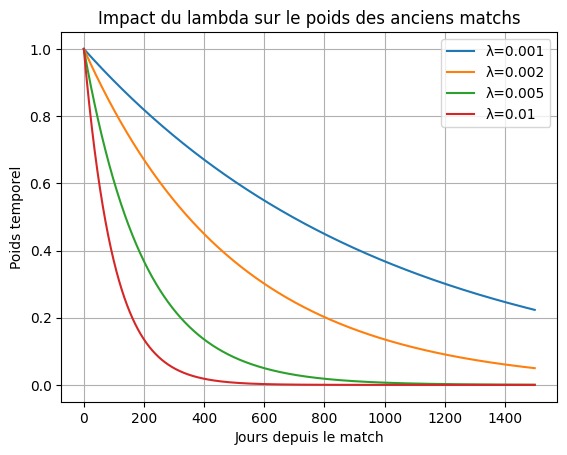

In [601]:
import numpy as np
import matplotlib.pyplot as plt

days = np.arange(0, 1500)  # ~4 ans
for lam in [0.001, 0.002, 0.005, 0.01]:
    plt.plot(days, np.exp(-lam * days), label=f'λ={lam}')
plt.xlabel("Jours depuis le match")
plt.ylabel("Poids temporel")
plt.title("Impact du lambda sur le poids des anciens matchs")
plt.legend()
plt.grid(True)
plt.show()


In [602]:
faker_games_by_league = (
    merged_df[merged_df['player_name'] == 'Faker']
    .groupby('league_name')['game_id']
    .nunique()
    .sort_values(ascending=False)
)

print(faker_games_by_league)


league_name
LCK                           495
Mid-Season Invitational        66
Worlds                         61
Esports World Cup              10
KeSPA Cup                       7
Red Bull League of Its Own      5
All-Star                        4
Mid-Season Cup                  3
Season Kickoff                  3
Name: game_id, dtype: int64


In [603]:
far_games_by_league = (
    merged_df[merged_df['player_name'] == 'Peyz']
    .groupby('league_name')['game_id']
    .nunique()
    .sort_values(ascending=False)
)

print(far_games_by_league)

league_name
LCK                        202
LCK Challengers League      72
Mid-Season Invitational     31
Worlds                       9
KeSPA Cup                    3
Esports World Cup            2
Name: game_id, dtype: int64
